In [1]:
from rl_qoc import QuantumEnvironment, ChannelReward, QiskitConfig, QEnvConfig, ExecutionConfig, GateTarget, FidelityReward
from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import RXGate, UGate, RZXGate
from gymnasium.spaces import Box
import numpy as np
seed = 30980922
np.random.seed(seed)
params = ParameterVector("a", 1)
angle = np.random.uniform(-np.pi, np.pi, size=(1,))
angle = np.array([np.pi/2])
gate = RXGate(*angle)
target = GateTarget(gate, (0,))
def apply_qc(qc:QuantumCircuit, params, qreg):
    # qc.rzx(params[0], qreg[0], qreg[1])
    qc.rx(params[0], qreg[0])

action_space = Box(-np.pi, np.pi, shape=(1,))
backend_config = QiskitConfig(apply_qc)
exec = ExecutionConfig(sampling_paulis=10000, n_shots=1, batch_size=1, n_reps=list(range(1, 10)),
                       dfe_precision=(0.01, 0.01), seed=seed,
                       c_factor=1)
channel = ChannelReward()
fidelity = FidelityReward()
channel_config = QEnvConfig(target, backend_config, action_space, reward=channel, execution_config=exec)

fidelity_config = QEnvConfig(target, backend_config, action_space, reward=fidelity,execution_config=exec)

fidelity_env = QuantumEnvironment(fidelity_config)
channel_env = QuantumEnvironment(channel_config)

/Users/arthurostrauss/Library/CloudStorage/OneDrive-NationalUniversityofSingapore/Coding_projects/Quantum_Optimal_Control/rl_qoc/helpers/__init__.py:9: UserWarning: pulse_utils is not available
  warnings.warn("pulse_utils is not available")
/Users/arthurostrauss/Documents/.venv/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/Users/arthurostrauss/Documents/.venv/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with v

In [2]:
print(gate.to_matrix())

[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]


In [3]:
angle


array([1.57079633])

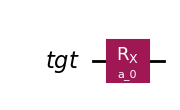

In [4]:
channel_env.circuit.draw("mpl")

In [5]:
data_no_dfe = channel.get_reward_data(channel_env.circuit, np.ones((1, 1)), channel_config, dfe_precision=None)
channel.get_reward_with_primitive(data_no_dfe, channel_env.estimator)

array([0.69309057])

In [6]:
data_no_dfe[0].fiducials

(PauliList(['Z', 'I']),
 SparsePauliOp(['Y', 'I'],
               coeffs=[-0.062375+0.j,  0.062375+0.j]))

In [7]:
data_no_dfe[1].fiducials

(PauliList(['Z', 'I']),
 SparsePauliOp(['Y', 'I'],
               coeffs=[0.062625+0.j, 0.062625+0.j]))

In [8]:
data_no_dfe[1].pauli_eigenstate

'|1>'

In [9]:
print(data_no_dfe.fiducials)
data_no_dfe.pubs[0]

[(PauliList(['Z', 'I']), SparsePauliOp(['Y', 'I'],
              coeffs=[-0.062375+0.j,  0.062375+0.j])), (PauliList(['Z', 'I']), SparsePauliOp(['Y', 'I'],
              coeffs=[0.062625+0.j, 0.062625+0.j])), (PauliList(['Y']), SparsePauliOp(['Z'],
              coeffs=[0.06275+0.j])), (PauliList(['Y']), SparsePauliOp(['Z'],
              coeffs=[-0.0633+0.j])), (PauliList(['X']), SparsePauliOp(['X'],
              coeffs=[0.0628+0.j])), (PauliList(['X']), SparsePauliOp(['X'],
              coeffs=[-0.06115+0.j]))]


EstimatorPub(<(1,)>)

In [10]:
data_dfe = channel.get_reward_data(channel_env.circuit, np.ones((1, 1)), channel_config, dfe_precision=(0.01, 0.01))
channel.get_reward_with_primitive(data_dfe, channel_env.estimator)

DFE precision guarantee (0.01, 0.01)
Pauli sampling 1000000


array([0.64569393])

In [11]:
print(data_dfe.fiducials)
data_dfe.pubs[0].precision

[(PauliList(['Z', 'I']), SparsePauliOp(['Y', 'I'],
              coeffs=[-0.06237175+0.j,  0.06237175+0.j])), (PauliList(['Z', 'I']), SparsePauliOp(['Y', 'I'],
              coeffs=[0.06233725+0.j, 0.06233725+0.j])), (PauliList(['Y']), SparsePauliOp(['Z'],
              coeffs=[0.0625645+0.j])), (PauliList(['Y']), SparsePauliOp(['Z'],
              coeffs=[-0.062662+0.j])), (PauliList(['X']), SparsePauliOp(['X'],
              coeffs=[0.062674+0.j])), (PauliList(['X']), SparsePauliOp(['X'],
              coeffs=[-0.0626815+0.j]))]


np.float64(0.0061501498963550455)

In [12]:
data2 = fidelity.get_reward_data(fidelity_env.circuit, np.ones((1, 1)), fidelity_config)

In [13]:
fidelity.get_reward_with_primitive(data2, fidelity_env.estimator)

array([[0.94715699]])

Number of repetitions: 1
Number of repetitions: 2
Number of repetitions: 3
Number of repetitions: 4
Number of repetitions: 5
Number of repetitions: 6
Number of repetitions: 7
Number of repetitions: 8
Number of repetitions: 9
Number of repetitions: 10
Number of repetitions: 11
Number of repetitions: 12
Number of repetitions: 13
Number of repetitions: 14
Number of repetitions: 15
Number of repetitions: 16
Number of repetitions: 17
Number of repetitions: 18
Number of repetitions: 19
Number of repetitions: 20
Number of repetitions: 21
Number of repetitions: 22
Number of repetitions: 23
Number of repetitions: 24
Number of repetitions: 25
Number of repetitions: 26
Number of repetitions: 27
Number of repetitions: 28
Number of repetitions: 29
Found parameters (fidelity method): [9.99999982e-02 1.38842090e-02 3.74819418e-18]
Number of repetitions: 1
Number of repetitions: 2
Number of repetitions: 3
Number of repetitions: 4
Number of repetitions: 5
Number of repetitions: 6
Number of repetitions:

[[np.float64(0.9471569949359656),
  np.float64(0.8053822788490477),
  np.float64(0.6196266639800445),
  np.float64(0.44878545971212963),
  np.float64(0.34702524177895394),
  np.float64(0.3466099044498779),
  np.float64(0.4476711337604034),
  np.float64(0.6181666553971286),
  np.float64(0.8040394950805855),
  np.float64(0.9463571763588178),
  np.float64(0.9999967355169018),
  np.float64(0.9479513195774985),
  np.float64(0.8067223456088817),
  np.float64(0.6210875939307233),
  np.float64(0.4499040532809619),
  np.float64(0.34744683989220543),
  np.float64(0.34620083604014745),
  np.float64(0.4465610972519727),
  np.float64(0.6167075967790153),
  np.float64(0.8026940206044637),
  np.float64(0.9455518795120191),
  np.float64(0.9999869421315468),
  np.float64(0.9487401347250586),
  np.float64(0.8080596691123345),
  np.float64(0.6225494166340777),
  np.float64(0.45102689255712125),
  np.float64(0.3478746905318328),
  np.float64(0.345798044562144),
  np.float64(0.44545537192900975)],
 [np.flo

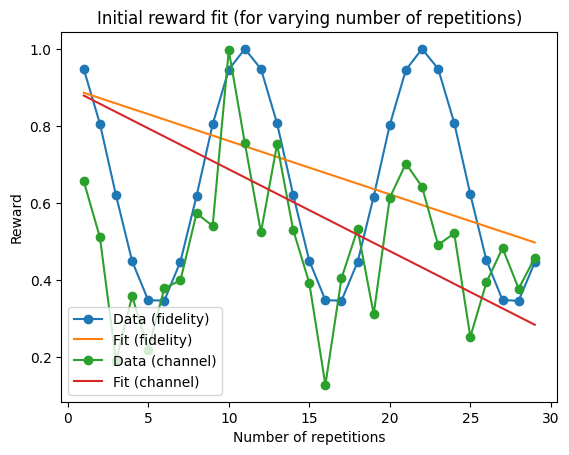

In [14]:
channel_env.initial_reward_fit(1*np.ones((1, 1)), reward_method=["fidelity", "channel"],
                          execution_config=ExecutionConfig(batch_size=1, n_reps= list(range(1, 30)), dfe_precision=(0.01, 0.01), seed=seed, c_factor=1))
